In [152]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score, f1_score
from regression_model import make_regression_pipeline
from classification_model import make_classification_pipeline

# 데이터
df = pd.read_pickle("train.pkl")

In [79]:
df

,일련번호,대분류,중분류,물건정보,낙찰가,최초입찰시기,낙찰개찰일시,낙찰차수,1차최저입찰가,2차최저입찰가,3차최저입찰가,4차최저입찰가,5차최저입찰가,최종최저입찰가,최종유찰여부,낙찰가율_최초최저가기준,낙찰가율_최종최저가기준
0,2013-07508-003,자동차,승용차,경북 구미시 공단동 ****,31050000.0,2016-05-06 11:00:00,2016-05-06 11:00:00,1.0,27000000.0,NaN,NaN,NaN,NaN,27000000.0,0,115.000000,115.000000
1,2013-11625-014,자동차,승용차,경상북도 영주시 가흥동 ****,2670000.0,2017-08-10 11:00:00,2017-09-07 11:00:00,5.0,2500000.0,2250000.0,2000000.0,1750000.0,1500000.0,1500000.0,0,106.800000,178.000000
2,2013-11625-015,자동차,승용차,경상북도 영주시 가흥동 ****,6510000.0,2017-08-10 11:00:00,2017-08-31 11:00:00,4.0,8000000.0,7200000.0,6400000.0,5600000.0,NaN,5600000.0,0,81.375000,116.250000
3,2013-11625-016,자동차,승용차,경상북도 영주시 가흥동 ****,14500000.0,2017-08-10 11:00:00,2017-08-10 11:00:00,1.0,14000000.0,NaN,NaN,NaN,NaN,14000000.0,0,103.571429,103.571429
4,2013-13532-001,자동차,승용차,"경기 연천군,연천군 연천읍 ****",1010000.0,2015-02-05 11:00:00,2015-02-05 11:00:00,1.0,500000.0,NaN,NaN,NaN,NaN,500000.0,0,202.000000,202.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31075,TX_0412425320161014000281,자동차,버스,현대 뉴 슈퍼에어로시티 46인승,6210000.0,2016-10-24 11:00:00,2016-10-24 11:00:00,1.0,5500000.0,NaN,NaN,NaN,NaN,5500000.0,0,112.909091,112.909091
31076,TX_0414680820200316000257,자동차,승합차,현대자동차 중형승합 이-카운티 3933cc 15인승,20610000.0,2020-03-31 10:00:00,2020-03-31 10:00:00,1.0,12000000.0,NaN,NaN,NaN,NaN,12000000.0,0,171.750000,171.750000
31077,TX_0418535220180514000760,자동차,승합차,"소형승합차, 현대, 스타렉스JUMBO, 터보인터쿨러 12인승 2WD GRX 일반형(...",2114000.0,2018-05-25 11:00:00,2018-05-25 11:00:00,1.0,2000000.0,NaN,NaN,NaN,NaN,2000000.0,0,105.700000,105.700000
31078,TX_0418747920181126000203,자동차,승합차,"경형승합차, 지엠대우, 2006년형뉴다마스ll 코치(LPG) 5인승 DLX, M/T...",3106000.0,2018-12-10 09:00:00,2018-12-10 09:00:00,1.0,800000.0,NaN,NaN,NaN,NaN,800000.0,0,388.250000,388.250000


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28417 entries, 0 to 31079
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   일련번호          28417 non-null  object        
 1   대분류           28417 non-null  object        
 2   중분류           28417 non-null  object        
 3   물건정보          28417 non-null  object        
 4   낙찰가           28417 non-null  float64       
 5   최초입찰시기        28417 non-null  datetime64[ns]
 6   낙찰개찰일시        28417 non-null  datetime64[ns]
 7   낙찰차수          28417 non-null  float64       
 8   1차최저입찰가       28417 non-null  float64       
 9   2차최저입찰가       4228 non-null   float64       
 10  3차최저입찰가       2289 non-null   float64       
 11  4차최저입찰가       1326 non-null   float64       
 12  5차최저입찰가       802 non-null    float64       
 13  최종최저입찰가       28417 non-null  float64       
 14  최종유찰여부        28417 non-null  int64         
 15  낙찰가율_최초최저가기준  28417 non-null  float64    

<Axes: >

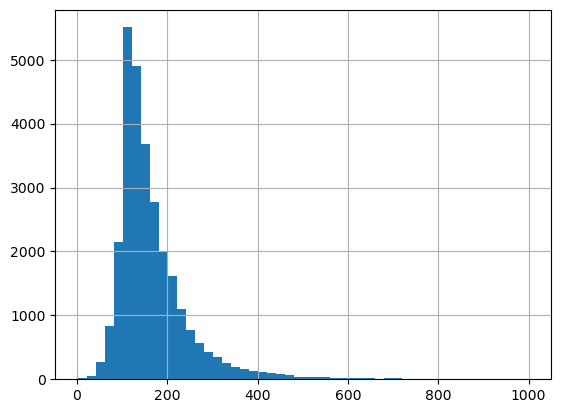

In [95]:
df['낙찰가율_최초최저가기준'].hist(bins=50)

In [134]:
df['낙찰차수'].value_counts()

낙찰차수
1.0     24189
2.0      1939
3.0       963
4.0       524
5.0       363
6.0       249
7.0       120
8.0        40
9.0        16
11.0        5
10.0        4
12.0        3
13.0        1
17.0        1
Name: count, dtype: int64

#### 차수 구분 모델

In [141]:
model_names = ['xgboost','random_forest','lightgbm']

In [142]:
# 데이터 추출
regression_df = df[df['최종유찰여부'] == 0]
regression_df["최초입찰시기"] = regression_df["최초입찰시기"].values.astype('int64') // 10**9  # 초 단위

# 분리
X = regression_df.loc[:, ['대분류', '중분류', '최초입찰시기', '1차최저입찰가']]
y = regression_df['낙찰차수']

# 전처리
cat_features = ['대분류', '중분류']
num_features = ['최초입찰시기', '1차최저입찰가']
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), cat_features),
        ('num', StandardScaler(), num_features)
    ]
)

# 파이프라인 구축 및 학습
pipeline = make_regression_pipeline(model_names, preprocessor)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
pipeline.fit(X_train, y_train)

# 예측
y_pred = pipeline.predict(X_test)

# 평가
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Test MSE : {mse:.4f}")
print(f"Test RMSE: {rmse:.4f}")

Test MSE : 0.9805
Test RMSE: 0.9902


#### 차수에 따른 가격 예측 모델

##### 개별 확인

In [135]:
set_rounds = 2
model_names = ['xgboost','random_forest','lightgbm']

In [ ]:
# 데이터 추출
regression_df = df[df['최종유찰여부'] == 0]
regression_df["최초입찰시기"] = regression_df["최초입찰시기"].values.astype('int64') // 10**9  # 초 단위
regression_df = regression_df[regression_df['낙찰차수'] == set_rounds]

# 분리
X = regression_df.loc[:, ['대분류', '중분류', '최초입찰시기', f'{set_rounds}차최저입찰가']]
y = regression_df['낙찰가율_최종최저가기준']

# 전처리
cat_features = ['대분류', '중분류']
num_features = ['최초입찰시기', f'{set_rounds}차최저입찰가']
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), cat_features),
        ('num', StandardScaler(), num_features)
    ]
)

# 파이프라인 구축 및 학습
pipeline = make_regression_pipeline(model_names, preprocessor)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
pipeline.fit(X_train, y_train)

# 예측
y_pred = pipeline.predict(X_test)

# 평가
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Test MSE : {mse:.4f}")
print(f"Test RMSE: {rmse:.4f}")

##### 반복하여 확인

In [ ]:
max_rounds = 5
model_names = ['xgboost','random_forest','lightgbm']

In [ ]:
rmse_with_wave = []

for set_rounds in range(1, max_rounds+1):
    # 데이터 추출
    regression_df = df[df['최종유찰여부'] == 0]
    regression_df["최초입찰시기"] = regression_df["최초입찰시기"].values.astype('int64') // 10**9  # 초 단위
    regression_df = regression_df[regression_df['낙찰차수'] == set_rounds]

    # 분리
    X = regression_df.loc[:, ['대분류', '중분류', '최초입찰시기', f'{set_rounds}차최저입찰가']]
    y = regression_df['낙찰가율_최종최저가기준']

    # 전처리
    cat_features = ['대분류', '중분류']
    num_features = ['최초입찰시기', f'{set_rounds}차최저입찰가']
    preprocessor = ColumnTransformer(
        transformers=[
            ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), cat_features),
            ('num', StandardScaler(), num_features)
        ]
    )

    # 파이프라인 구축 및 학습
    pipeline = make_regression_pipeline(model_names, preprocessor)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    pipeline.fit(X_train, y_train)

    # 예측
    y_pred = pipeline.predict(X_test)

    # 평가
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    rmse_with_wave.append(rmse)

print(*rmse_with_wave)

#### 가격 예측 모델 (기본)

In [ ]:
model_names = ['xgboost','random_forest','lightgbm']

In [ ]:
# 데이터 추출
regression_df = df[df['최종유찰여부'] == 0]
regression_df["최초입찰시기"] = regression_df["최초입찰시기"].values.astype('int64') // 10**9  # 초 단위

# 분리
X = regression_df.loc[:, ['대분류', '중분류', '최초입찰시기', '1차최저입찰가']]
y = regression_df['낙찰가율_최초최저가기준']

# 전처리
cat_features = ['대분류', '중분류']
num_features = ['최초입찰시기', '1차최저입찰가']
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), cat_features),
        ('num', StandardScaler(), num_features)
    ]
)

# 파이프라인 구축 및 학습
pipeline = make_regression_pipeline(model_names, preprocessor)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
pipeline.fit(X_train, y_train)

# 예측
y_pred = pipeline.predict(X_test)

# 평가
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Test MSE : {mse:.4f}")
print(f"Test RMSE: {rmse:.4f}")

#### 이상치 제거 버전

In [143]:
target_col = '낙찰가율_최초최저가기준'

In [144]:
# 데이터 추출
regression_df = df[df['최종유찰여부'] == 0]
regression_df["최초입찰시기"] = regression_df["최초입찰시기"].values.astype('int64') // 10**9  # 초 단위

# 이상치 제거
Q1 = regression_df[target_col].quantile(0.25)
Q3 = regression_df[target_col].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
regression_df = regression_df[(regression_df[target_col] >= lower_bound) & (regression_df[target_col] <= upper_bound)]

# 분리
X = regression_df.loc[:, ['대분류', '중분류', '최초입찰시기', '1차최저입찰가']]
y = regression_df[target_col]

# 전처리
cat_features = ['대분류', '중분류']
num_features = ['최초입찰시기', '1차최저입찰가']
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), cat_features),
        ('num', StandardScaler(), num_features)
    ]
)

# 파이프라인 구축 및 학습
pipeline = make_regression_pipeline(model_names, preprocessor)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
pipeline.fit(X_train, y_train)

# 예측
y_pred = pipeline.predict(X_test)

# 평가
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Test MSE : {mse:.4f}")
print(f"Test RMSE: {rmse:.4f}")

Test MSE : 2104.1257
Test RMSE: 45.8707


#### 차수에 따른 낙찰 여부

In [168]:
# 결과 저장용 리스트
rows = []
max_rounds = 5

# 반복 처리
for _, row in df.iterrows():
    for round_num in range(1, max_rounds + 1):
        col_name = f"{round_num}차최저입찰가"
        bid_price = row.get(col_name)

        # 입찰가가 없거나, 차수가 낙찰차수보다 크면 무시
        if pd.isna(bid_price):
            continue
        if not pd.isna(row['낙찰차수']) and round_num > int(row['낙찰차수']):
            break

        rows.append({
            '일련번호': row['일련번호'],
            '대분류': row['대분류'],
            '중분류': row['중분류'],
            '물건정보': row['물건정보'],
            '최초입찰시기': row['최초입찰시기'],
            '차수': round_num,
            '최저입찰가': bid_price,
            '낙찰여부': 1 if round_num == int(row['낙찰차수']) else 0
        })

# long 형태 데이터프레임 생성
long_df = pd.DataFrame(rows)

# 낙찰가를 df에서 가져와 병합
long_df = long_df.merge(df[['일련번호', '낙찰가']], on='일련번호', how='left')
long_df = long_df.merge(df[['일련번호', '낙찰가율_최초최저가기준']], on='일련번호', how='left')
long_df = long_df.merge(df[['일련번호', '낙찰가율_최종최저가기준']], on='일련번호', how='left')

In [169]:
long_df

,일련번호,대분류,중분류,물건정보,최초입찰시기,차수,최저입찰가,낙찰여부,낙찰가,낙찰가율_최초최저가기준,낙찰가율_최종최저가기준
0,2013-07508-003,자동차,승용차,경북 구미시 공단동 ****,2016-05-06 11:00:00,1,27000000.0,1,31050000.0,115.000000,115.000000
1,2013-11625-014,자동차,승용차,경상북도 영주시 가흥동 ****,2017-08-10 11:00:00,1,2500000.0,0,2670000.0,106.800000,178.000000
2,2013-11625-014,자동차,승용차,경상북도 영주시 가흥동 ****,2017-08-10 11:00:00,2,2250000.0,0,2670000.0,106.800000,178.000000
3,2013-11625-014,자동차,승용차,경상북도 영주시 가흥동 ****,2017-08-10 11:00:00,3,2000000.0,0,2670000.0,106.800000,178.000000
4,2013-11625-014,자동차,승용차,경상북도 영주시 가흥동 ****,2017-08-10 11:00:00,4,1750000.0,0,2670000.0,106.800000,178.000000
...,...,...,...,...,...,...,...,...,...,...,...
37057,TX_0412425320161014000281,자동차,버스,현대 뉴 슈퍼에어로시티 46인승,2016-10-24 11:00:00,1,5500000.0,1,6210000.0,112.909091,112.909091
37058,TX_0414680820200316000257,자동차,승합차,현대자동차 중형승합 이-카운티 3933cc 15인승,2020-03-31 10:00:00,1,12000000.0,1,20610000.0,171.750000,171.750000
37059,TX_0418535220180514000760,자동차,승합차,"소형승합차, 현대, 스타렉스JUMBO, 터보인터쿨러 12인승 2WD GRX 일반형(...",2018-05-25 11:00:00,1,2000000.0,1,2114000.0,105.700000,105.700000
37060,TX_0418747920181126000203,자동차,승합차,"경형승합차, 지엠대우, 2006년형뉴다마스ll 코치(LPG) 5인승 DLX, M/T...",2018-12-10 09:00:00,1,800000.0,1,3106000.0,388.250000,388.250000


In [173]:
long_df['차수'].value_counts()

차수
1    28417
2     4228
3     2289
4     1326
5      802
Name: count, dtype: int64

In [176]:
long_df = long_df[long_df['차수'] < 5]

In [177]:
c_model_names = ['xgboost','random_forest','lightgbm']
r_model_names = ['xgboost','random_forest','lightgbm']
target = '낙찰가율_최종최저가기준'

In [178]:
# 데이터
classification_df = long_df.copy()
classification_df["최초입찰시기"] = classification_df["최초입찰시기"].values.astype('int64') // 10**9  # 초 단위

# 분리
X = classification_df[['대분류', '중분류', '최초입찰시기', '차수', '최저입찰가']]
y = classification_df['낙찰여부']

# 클래스 수 확인
num_pos = (y == 1).sum()
num_neg = (y == 0).sum()

# 전처리
cat_features = ['대분류', '중분류']
num_features = ['최초입찰시기', '차수', '최저입찰가']
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), cat_features),
        ('num', StandardScaler(), num_features)
    ]
)

# 파이프라인 생성
c_pipeline = make_classification_pipeline(c_model_names, preprocessor, num_pos, num_neg)

# 학습 및 예측
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
c_pipeline.fit(X_train, y_train)
y_pred = c_pipeline.predict(X_test)

# 평가
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, zero_division=0)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1 Score : {f1:.4f}")


Accuracy : 0.7876
Precision: 0.8745
Recall   : 0.8429
F1 Score : 0.8584


In [179]:
# 데이터
regression_df = long_df[long_df['낙찰여부'] == 1].copy()
regression_df["최초입찰시기"] = regression_df["최초입찰시기"].values.astype('int64') // 10**9  # 초 단위

# 분리
X = regression_df[['대분류', '중분류', '최초입찰시기', '차수', '최저입찰가']]
y = regression_df[target]

# 전처리
cat_features = ['대분류', '중분류']
num_features = ['최초입찰시기', '최저입찰가']
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), cat_features),
        ('num', StandardScaler(), num_features)
    ]
)

# 학습 및 예측
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
r_pipeline = make_regression_pipeline(r_model_names, preprocessor)
r_pipeline.fit(X_train, y_train)
y_pred = r_pipeline.predict(X_test)

# 평가
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"Test MSE : {mse:.2f}")
print(f"Test RMSE: {rmse:.2f}")
print(f"R² Score : {r2:.4f}")

Test MSE : 5054.66
Test RMSE: 71.10
R² Score : 0.2330


In [ ]:
# 데이터 추출
regression_df = long_df[long_df['낙찰여부'] == 1]
regression_df["최초입찰시기"] = regression_df["최초입찰시기"].values.astype('int64') // 10**9  # 초 단위

# 분리
X = regression_df.loc[:, ['대분류', '중분류', '최초입찰시기', '차수', '최저입찰가']]
y = regression_df['낙찰가']

# 전처리
cat_features = ['대분류', '중분류']
num_features = ['최초입찰시기', '최저입찰가']
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), cat_features),
        ('num', StandardScaler(), num_features)
    ]
)

# 파이프라인 구축 및 학습
r_pipeline = make_regression_pipeline(r_model_names, preprocessor)
r_pipeline.fit(X, y)

# 데이터
classification_df = long_df.copy()
classification_df["최초입찰시기"] = classification_df["최초입찰시기"].values.astype('int64') // 10**9  # 초 단위

# 분리
X = classification_df[['대분류', '중분류', '최초입찰시기', '차수', '최저입찰가']]
y = classification_df['낙찰여부']

# 클래스 수 확인
num_pos = (y == 1).sum()
num_neg = (y == 0).sum()

# 전처리
cat_features = ['대분류', '중분류']
num_features = ['최초입찰시기', '차수', '최저입찰가']
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), cat_features),
        ('num', StandardScaler(), num_features)
    ]
)

# 파이프라인 생성
c_pipeline = make_classification_pipeline(c_model_names, preprocessor, num_pos, num_neg)

# 학습 및 예측
c_pipeline.fit(X, y)

C:\Users\hwang\AppData\Local\Temp\ipykernel_32920\2299627880.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regression_df["최초입찰시기"] = regression_df["최초입찰시기"].values.astype('int64') // 10**9  # 초 단위


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['대분류', '중분류']),
                                                 ('num', StandardScaler(),
                                                  ['최초입찰시기', '최저입찰가'])])),
                ('voting',
                 VotingRegressor(estimators=[('xgboost',
                                              XGBRegressor(base_score=None,
                                                           booster=None,
                                                           callbacks=None,
                                                           colsample_bylevel=None,
                                                           colsample_bynode=None,
                                                           colsample...
                                                           max_cat_threshold=None,
                                                           max_cat_to_onehot=None,
                                                           max_delta_step=None,
                                                           max_depth=None,
                                                           max_leaves=None,
                                                           min_child_weight=None,
                                                           missing=nan,
                                                           monotone_constraints=None,
                                                           multi_strategy=None,
                                                           n_estimators=100,
                                                           n_jobs=None,
                                                           num_parallel_tree=None,
                                                           random_state=42, ...)),
                                             ('random_forest',
                                              RandomForestRegressor(random_state=42)),
                                             ('lightgbm',
                                              LGBMRegressor(random_state=42,
                                                            verbose=-1))]))])